# Climate Anxiety in Youth and Perception of Government
## Question/Hypothesis: 
**Response Variable:** Q1 - I am worried that climate change threatens people and the planet.

**Predictors:** language, country, region, age, sex, Q2-Q8

## Importing Data

In [1]:
# Data Processing
import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Modeling
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import export_graphviz
from scipy.stats import randint
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import OrdinalEncoder
import graphviz
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from statsmodels.miscmodels.ordinal_model import OrderedModel
from imblearn.over_sampling import SMOTE
import tensorflow as tf

In [2]:
df = pd.read_spss('Climate Anxiety-3.SAV')
df.head()

,Respondent_Serial,language,country,D1,D2,D3,Q1,Q2_1,Q2_2,Q2_3,...,regionUS,regionUK,regionIndia,regionNigeria,regionPhilippines,regionFinland,regionPortugal,regionBrazil,regionFrance,weight
0,25.0,French,France,22.0,man,France: South,extremely,yes,yes,yes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,South,0.955127
1,26.0,English,Philippines,25.0,woman,Philippines: Metro Luzon Urban Beltway/ North ...,extremely,yes,yes,yes,...,NaN,NaN,NaN,NaN,Metro Luzon Urban Beltway/ North Luzon Agribus...,NaN,NaN,NaN,NaN,0.649680
2,27.0,English,Philippines,24.0,woman,Philippines: Metro Luzon Urban Beltway/ North ...,extremely,yes,yes,yes,...,NaN,NaN,NaN,NaN,Metro Luzon Urban Beltway/ North Luzon Agribus...,NaN,NaN,NaN,NaN,0.649680
3,28.0,English,Australia,20.0,woman,Australia: South Australia,a little,no,yes,no,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.915752
4,29.0,English,India,18.0,woman,India: West India,extremely,no,no,no,...,NaN,NaN,West India,NaN,NaN,NaN,NaN,NaN,NaN,1.183360


## Data Exploration

In [3]:
df.columns, len(df.columns)

(Index(['Respondent_Serial', 'language', 'country', 'D1', 'D2', 'D3', 'Q1',
        'Q2_1', 'Q2_2', 'Q2_3', 'Q2_4', 'Q2_5', 'Q2_6', 'Q2_7', 'Q2_8', 'Q2_9',
        'Q2_10', 'Q2_11', 'Q2_12', 'Q2_13', 'Q2_14', 'Q3', 'Q4_1', 'Q4_2',
        'Q4_3', 'Q4_4', 'Q4_5', 'Q4_6', 'Q4_7', 'Q5', 'Q6', 'Q7_1', 'Q7_2',
        'Q7_3', 'Q7_4', 'Q7_5', 'Q7_6', 'Q7_7', 'Q7_8', 'Q7_9', 'Q8_1', 'Q8_2',
        'Q8_3', 'Q8_4', 'Q8_5', 'Q8_6', 'Q8_7', 'Q8_8', 'Q8_9', 'yyyymmdd',
        'AgeGender', 'regionAustralia', 'regionUS', 'regionUK', 'regionIndia',
        'regionNigeria', 'regionPhilippines', 'regionFinland', 'regionPortugal',
        'regionBrazil', 'regionFrance', 'weight'],
       dtype='object'),
 62)

In [4]:
df.dtypes

Respondent_Serial     float64
language             category
country              category
D1                    float64
D2                   category
                       ...   
regionFinland        category
regionPortugal       category
regionBrazil         category
regionFrance         category
weight                float64
Length: 62, dtype: object

In [5]:
df['Q1'].value_counts()

Q1
very           3223
extremely      2706
moderately     2428
a little       1022
not worried     473
Name: count, dtype: int64

In [6]:
df['Q1'].value_counts(normalize=True)

Q1
very           0.327142
extremely      0.274665
moderately     0.246447
a little       0.103735
not worried    0.048011
Name: proportion, dtype: float64

In [7]:
# Count nan or 'Prefer not to say' values in the Q1 column
df['Q1'].isna().sum(), df['Q1'].str.contains('Prefer not to say').sum()

(148, 0)

In [8]:
df[df['Q1'].isna()]

,Respondent_Serial,language,country,D1,D2,D3,Q1,Q2_1,Q2_2,Q2_3,...,regionUS,regionUK,regionIndia,regionNigeria,regionPhilippines,regionFinland,regionPortugal,regionBrazil,regionFrance,weight
68,114.0,English,Australia,21.0,woman,Australia: Tasmania,NaN,no,yes,yes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.739153
162,232.0,English,United Kingdom,21.0,woman,United Kingdom: North,NaN,no,yes,no,...,NaN,North,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.957871
209,290.0,English,Australia,21.0,woman,Australia: New South Wales,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.771648
213,296.0,English,India,23.0,man,India: North India,NaN,no,no,no,...,NaN,NaN,North India,NaN,NaN,NaN,NaN,NaN,NaN,0.814742
230,321.0,English,Australia,21.0,man,Australia: Victoria,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.129098
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9807,14903.0,English,Australia,25.0,man,Australia: Western Australia,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.145472
9853,15041.0,English,Nigeria,21.0,woman,Nigeria: South West,NaN,no,no,no,...,NaN,NaN,NaN,South West,NaN,NaN,NaN,NaN,NaN,0.433441
9862,15057.0,English,Nigeria,21.0,woman,Nigeria: South West,NaN,no,yes,yes,...,NaN,NaN,NaN,South West,NaN,NaN,NaN,NaN,NaN,0.433441
9867,15067.0,English,Nigeria,23.0,man,Nigeria: South South,NaN,yes,no,yes,...,NaN,NaN,NaN,South South,NaN,NaN,NaN,NaN,NaN,0.348822


In [9]:
df['AgeGender'].unique(), len(df['AgeGender'])

(['Men 21-25', 'Women 21-25', 'Women 16-20', 'Men 16-20']
 Categories (4, object): ['Men 16-20', 'Men 21-25', 'Women 16-20', 'Women 21-25'],
 10000)

In [10]:
# Count the number of men and women in the dataset
df['AgeGender'].value_counts()

AgeGender
Women 21-25    3153
Men 21-25      2900
Men 16-20      1994
Women 16-20    1953
Name: count, dtype: int64

## Data Cleaning

#### Replace columns with more descriptive names
The original convention used to describe the columns is not very descriptive. We will replace the column names with more descriptive names.

The new convention will be the Question number (Q1, Q2, Q3, etc.) followed by a descriptive word from the poll associated with that question/subquestion.

For example, Q2 is "Does climate change make you feel any of the following?" with sad being one of the options, and the responses being yes, no, and prefer not to say. The new column name will be Q2_sad and will contain the values yes, not, or nan.

In [11]:
columns = ['Repondent_Serial', 'language', 'country', 'age', 'sex', 'country:region', 
           'Q1', 
           'Q2_sad', 'Q2_helpless', 'Q2_anxious', 'Q2_afraid', 'Q2_optimistic',
           'Q2_angry', 'Q2_guilty', 'Q2_ashamed', 'Q2_hurt', 'Q2_depressed', 'Q2_despair',
           'Q2_grief', 'Q2_powerless', 'Q2_indifferent', 
           'Q3', 
           'Q4_hesitant', 'Q4_doomed','Q4_frightening', 'Q4_oppotunities', 'Q4_threatened', 'Q4_destroyed', 'Q4_failed',
           'Q5', 
           'Q6', 
           'Q7_concerns', 'Q7_catastrophe', 'Q7_distress', 'Q7_science', 'Q7_generations', 'Q7_trusted', 'Q7_effectiveness', 'Q7_failing', 'Q7_betraying',
           'Q8_anguished', 'Q8_abandoned', 'Q8_afraid', 'Q8_hopeful', 'Q8_angry', 'Q8_valued', 'Q8_ashamed', 'Q8_belittled', 'Q8_protected',
           'yyyymmdd','AgeGender', 
           'regionAustralia', 'regionUS', 'regionUK', 'regionIndia', 'regionNigeria', 'regionPhilippines', 'regionFinland', 'regionPortugal', 'regionBrazil', 'regionFrance', 'weight']

In [12]:
df.columns = columns
df.columns, len(df.columns)

(Index(['Repondent_Serial', 'language', 'country', 'age', 'sex',
        'country:region', 'Q1', 'Q2_sad', 'Q2_helpless', 'Q2_anxious',
        'Q2_afraid', 'Q2_optimistic', 'Q2_angry', 'Q2_guilty', 'Q2_ashamed',
        'Q2_hurt', 'Q2_depressed', 'Q2_despair', 'Q2_grief', 'Q2_powerless',
        'Q2_indifferent', 'Q3', 'Q4_hesitant', 'Q4_doomed', 'Q4_frightening',
        'Q4_oppotunities', 'Q4_threatened', 'Q4_destroyed', 'Q4_failed', 'Q5',
        'Q6', 'Q7_concerns', 'Q7_catastrophe', 'Q7_distress', 'Q7_science',
        'Q7_generations', 'Q7_trusted', 'Q7_effectiveness', 'Q7_failing',
        'Q7_betraying', 'Q8_anguished', 'Q8_abandoned', 'Q8_afraid',
        'Q8_hopeful', 'Q8_angry', 'Q8_valued', 'Q8_ashamed', 'Q8_belittled',
        'Q8_protected', 'yyyymmdd', 'AgeGender', 'regionAustralia', 'regionUS',
        'regionUK', 'regionIndia', 'regionNigeria', 'regionPhilippines',
        'regionFinland', 'regionPortugal', 'regionBrazil', 'regionFrance',
        'weight'],
       dty

In [13]:
# Drop all of the region columns
# Make a new region column that splits the country:region column by ':'
df['region'] = df['country:region'].str.split(':').str[1]
df = df.drop(columns=['regionAustralia', 'regionUS', 'regionUK', 'regionIndia', 'regionNigeria', 'regionPhilippines', 'regionFinland', 'regionPortugal', 'regionBrazil', 'regionFrance'])
df.columns, len(df.columns)

(Index(['Repondent_Serial', 'language', 'country', 'age', 'sex',
        'country:region', 'Q1', 'Q2_sad', 'Q2_helpless', 'Q2_anxious',
        'Q2_afraid', 'Q2_optimistic', 'Q2_angry', 'Q2_guilty', 'Q2_ashamed',
        'Q2_hurt', 'Q2_depressed', 'Q2_despair', 'Q2_grief', 'Q2_powerless',
        'Q2_indifferent', 'Q3', 'Q4_hesitant', 'Q4_doomed', 'Q4_frightening',
        'Q4_oppotunities', 'Q4_threatened', 'Q4_destroyed', 'Q4_failed', 'Q5',
        'Q6', 'Q7_concerns', 'Q7_catastrophe', 'Q7_distress', 'Q7_science',
        'Q7_generations', 'Q7_trusted', 'Q7_effectiveness', 'Q7_failing',
        'Q7_betraying', 'Q8_anguished', 'Q8_abandoned', 'Q8_afraid',
        'Q8_hopeful', 'Q8_angry', 'Q8_valued', 'Q8_ashamed', 'Q8_belittled',
        'Q8_protected', 'yyyymmdd', 'AgeGender', 'weight', 'region'],
       dtype='object'),
 53)

##### Note: Drop all rows with missing response variable values

In [14]:
df = df.dropna(subset=['Q1'])

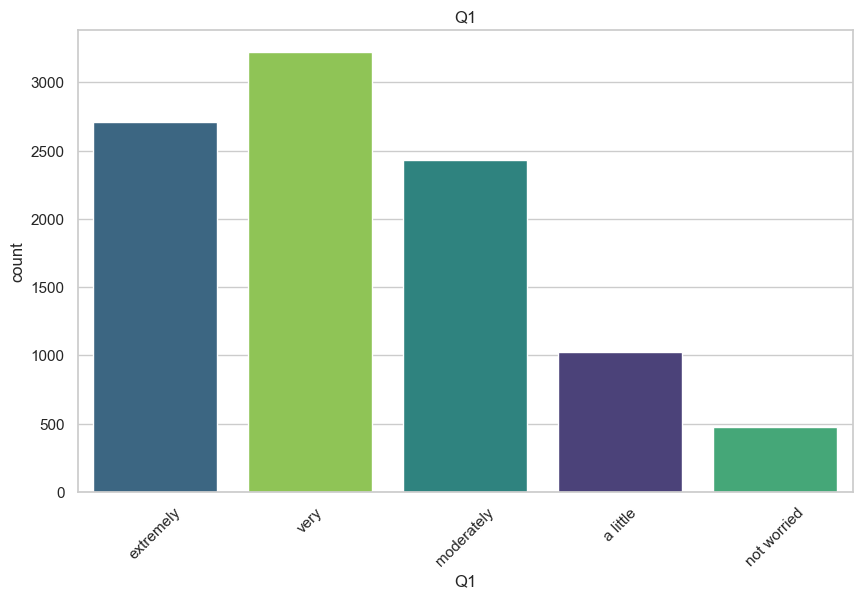

In [15]:
order = ['extremely', 'very', 'moderately', 'a little', 'not worried']
sns.set_theme(style='whitegrid')
plt.figure(figsize=(10, 6))
# Sort by the value counts of the Q1 column
# sns.countplot(x='Q1', data=df, hue='Q1', palette='viridis', legend=False, order=df['Q1'].value_counts().sort_values(ascending=False).index)
sns.countplot(x='Q1', data=df, hue='Q1', palette='viridis', legend=False, order=order)
plt.xticks(rotation=45)
plt.title('Q1')
plt.show()

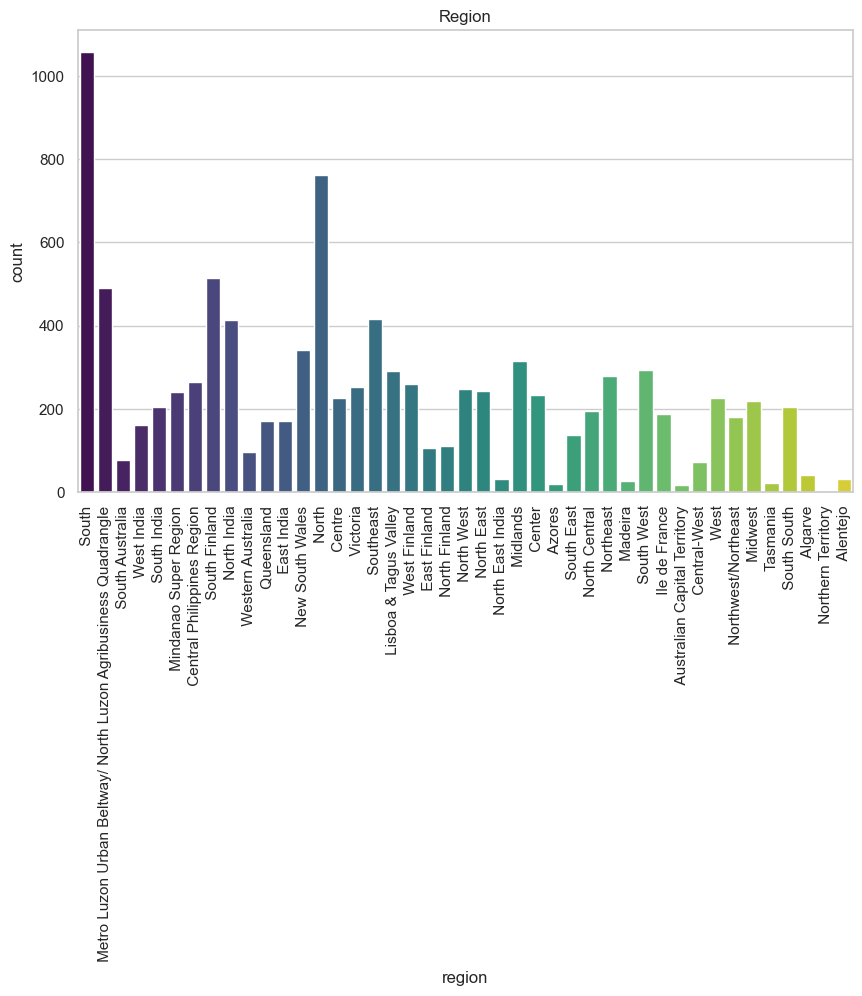

In [16]:
sns.set_theme(style='whitegrid')
plt.figure(figsize=(10, 6))
sns.countplot(x='region', data=df, hue='region', palette='viridis', legend=False)
plt.xticks(rotation=90)
plt.title('Region')
plt.show()

In [17]:
# Find all rows with no null values
df[df.notnull().any(axis=1)]

,Repondent_Serial,language,country,age,sex,country:region,Q1,Q2_sad,Q2_helpless,Q2_anxious,...,Q8_hopeful,Q8_angry,Q8_valued,Q8_ashamed,Q8_belittled,Q8_protected,yyyymmdd,AgeGender,weight,region
0,25.0,French,France,22.0,man,France: South,extremely,yes,yes,yes,...,not at all,extremely,not at all,moderately,NaN,not at all,20210518.0,Men 21-25,0.955127,South
1,26.0,English,Philippines,25.0,woman,Philippines: Metro Luzon Urban Beltway/ North ...,extremely,yes,yes,yes,...,moderately,moderately,moderately,moderately,moderately,moderately,20210518.0,Women 21-25,0.649680,Metro Luzon Urban Beltway/ North Luzon Agribu...
2,27.0,English,Philippines,24.0,woman,Philippines: Metro Luzon Urban Beltway/ North ...,extremely,yes,yes,yes,...,not at all,moderately,not at all,moderately,moderately,not at all,20210518.0,Women 21-25,0.649680,Metro Luzon Urban Beltway/ North Luzon Agribu...
3,28.0,English,Australia,20.0,woman,Australia: South Australia,a little,no,yes,no,...,not at all,not at all,not at all,not at all,not at all,not at all,20210518.0,Women 16-20,0.915752,South Australia
4,29.0,English,India,18.0,woman,India: West India,extremely,no,no,no,...,extremely,very,extremely,very,extremely,extremely,20210518.0,Women 16-20,1.183360,West India
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15413.0,English,Australia,21.0,woman,Australia: Tasmania,extremely,yes,yes,yes,...,a little,extremely,a little,extremely,a little,not at all,20210607.0,Women 21-25,0.739153,Tasmania
9996,15415.0,English,Australia,25.0,woman,Australia: New South Wales,very,yes,yes,yes,...,a little,moderately,not at all,a little,not at all,a little,20210607.0,Women 21-25,0.771648,New South Wales
9997,15416.0,English,Australia,19.0,woman,Australia: New South Wales,extremely,yes,yes,yes,...,not at all,not at all,not at all,not at all,not at all,not at all,20210607.0,Women 16-20,0.869418,New South Wales
9998,15417.0,English,Australia,21.0,woman,Australia: Western Australia,very,yes,yes,yes,...,moderately,moderately,a little,very,moderately,a little,20210607.0,Women 21-25,0.821953,Western Australia


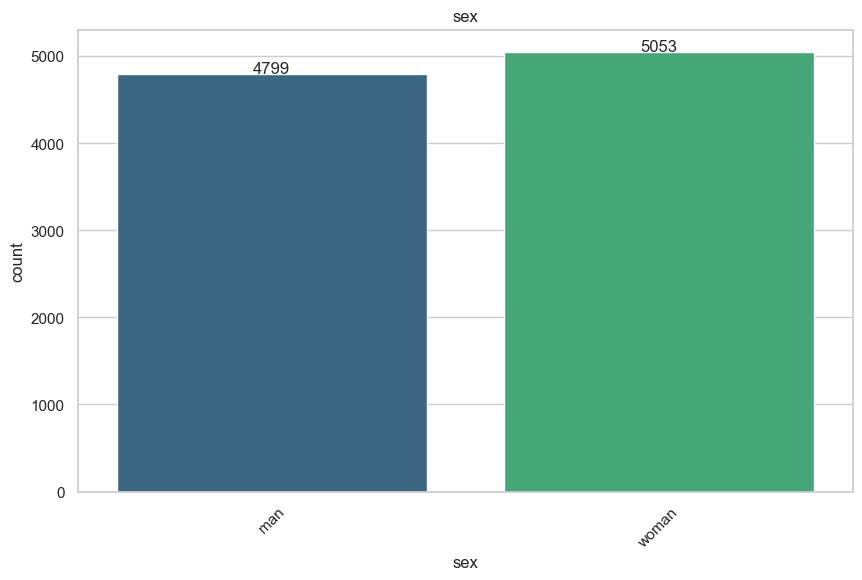

In [18]:
sns.set_theme(style='whitegrid')
plt.figure(figsize=(10, 6))

# Limit the number of unique values in the 'sex' column to a manageable number
top_sex = df['sex'].value_counts().nlargest(10).index
df_limited = df[df['sex'].isin(top_sex)]

sns.countplot(x='sex', data=df_limited, hue='sex', palette='viridis', legend=False)
plt.xticks(rotation=45)
plt.title('sex')

for i, sex in enumerate(df_limited['sex'].unique()):
    sex_count = df_limited['sex'].value_counts()[sex]
    plt.text(i, sex_count, f'{sex_count}', ha='center')

plt.show()

##### Note: Show most populus regions in the dataset

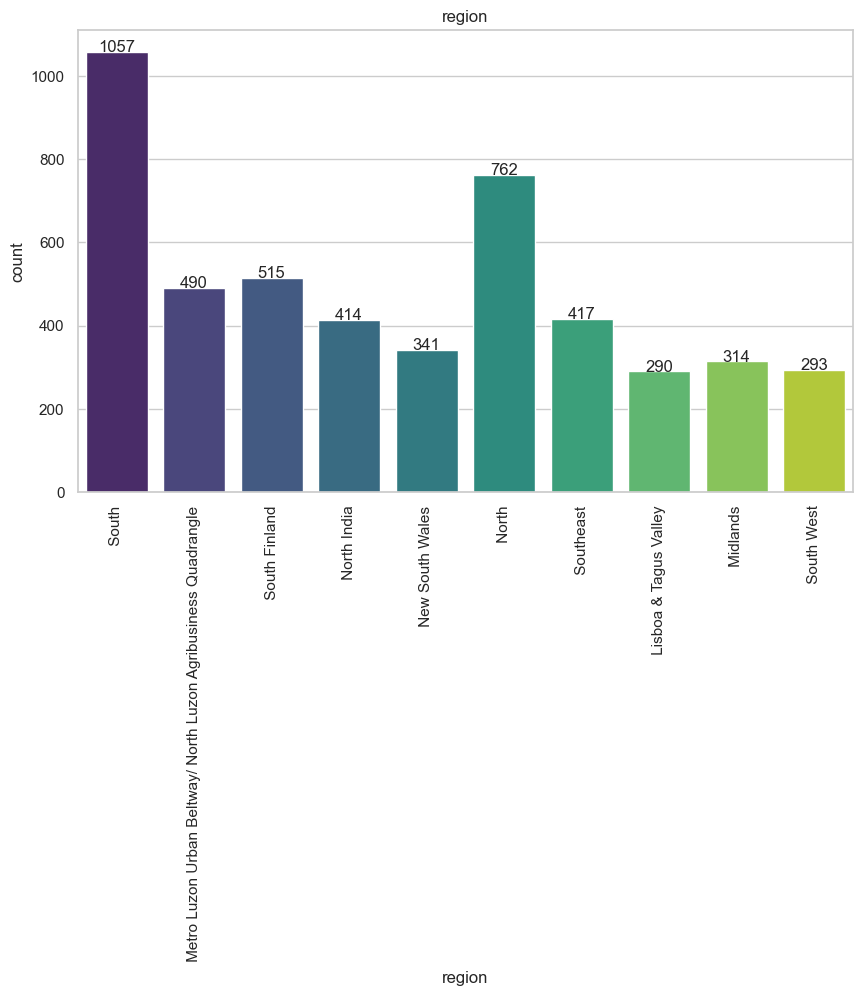

In [19]:
sns.set_theme(style='whitegrid')
plt.figure(figsize=(10, 6))

# Limit the number of unique values in the 'region' column to a manageable number
top_region = df['region'].value_counts().nlargest(10).index
df_limited = df[df['region'].isin(top_region)]

sns.countplot(x='region', data=df_limited, hue='region', palette='viridis', legend=False)
plt.xticks(rotation=90)
plt.title('region')

for i, region in enumerate(df_limited['region'].unique()):
    region_count = df_limited['region'].value_counts()[region]
    plt.text(i, region_count, f'{region_count}', ha='center')

plt.show()

In [20]:
# drop unused variables 
X = df.drop(columns=['Repondent_Serial', 'language', 'country', 'country:region', 'yyyymmdd', 'AgeGender', 'region', 'weight', 'Q1']) # not the same as the X used in data analysis
y = df['Q1']

for column in X.columns:
    summary = X[column].describe()

    print(f'{column}') 
    print(summary)

age
count    9852.000000
mean       21.241677
std         2.550188
min        16.000000
25%        19.000000
50%        21.000000
75%        23.000000
max        25.000000
Name: age, dtype: float64
sex
count      9852
unique        2
top       woman
freq       5053
Name: sex, dtype: object
Q2_sad
count     9735
unique       2
top        yes
freq      6661
Name: Q2_sad, dtype: object
Q2_helpless
count     9711
unique       2
top        yes
freq      5073
Name: Q2_helpless, dtype: object
Q2_anxious
count     9720
unique       2
top        yes
freq      6179
Name: Q2_anxious, dtype: object
Q2_afraid
count     9740
unique       2
top        yes
freq      6744
Name: Q2_afraid, dtype: object
Q2_optimistic
count     9636
unique       2
top         no
freq      6596
Name: Q2_optimistic, dtype: object
Q2_angry
count     9707
unique       2
top        yes
freq      5704
Name: Q2_angry, dtype: object
Q2_guilty
count     9705
unique       2
top        yes
freq      5021
Name: Q2_guilty, dtype: obj

In [23]:
# Change the sex column to be binary (0 or 1)
X['sex'] = [0 if sex == 'man' else 1 for sex in df['sex']]

#change yes/no questions to be binary (0 = no, 1 = yes?)
for column in X.columns:

    if X[column].unique().size == 2:
        X[column] = [0 if value == X[column].unique()[0] else 1 for value in X[column]]
    else:
        X[column] = X[column].astype('category').cat.codes

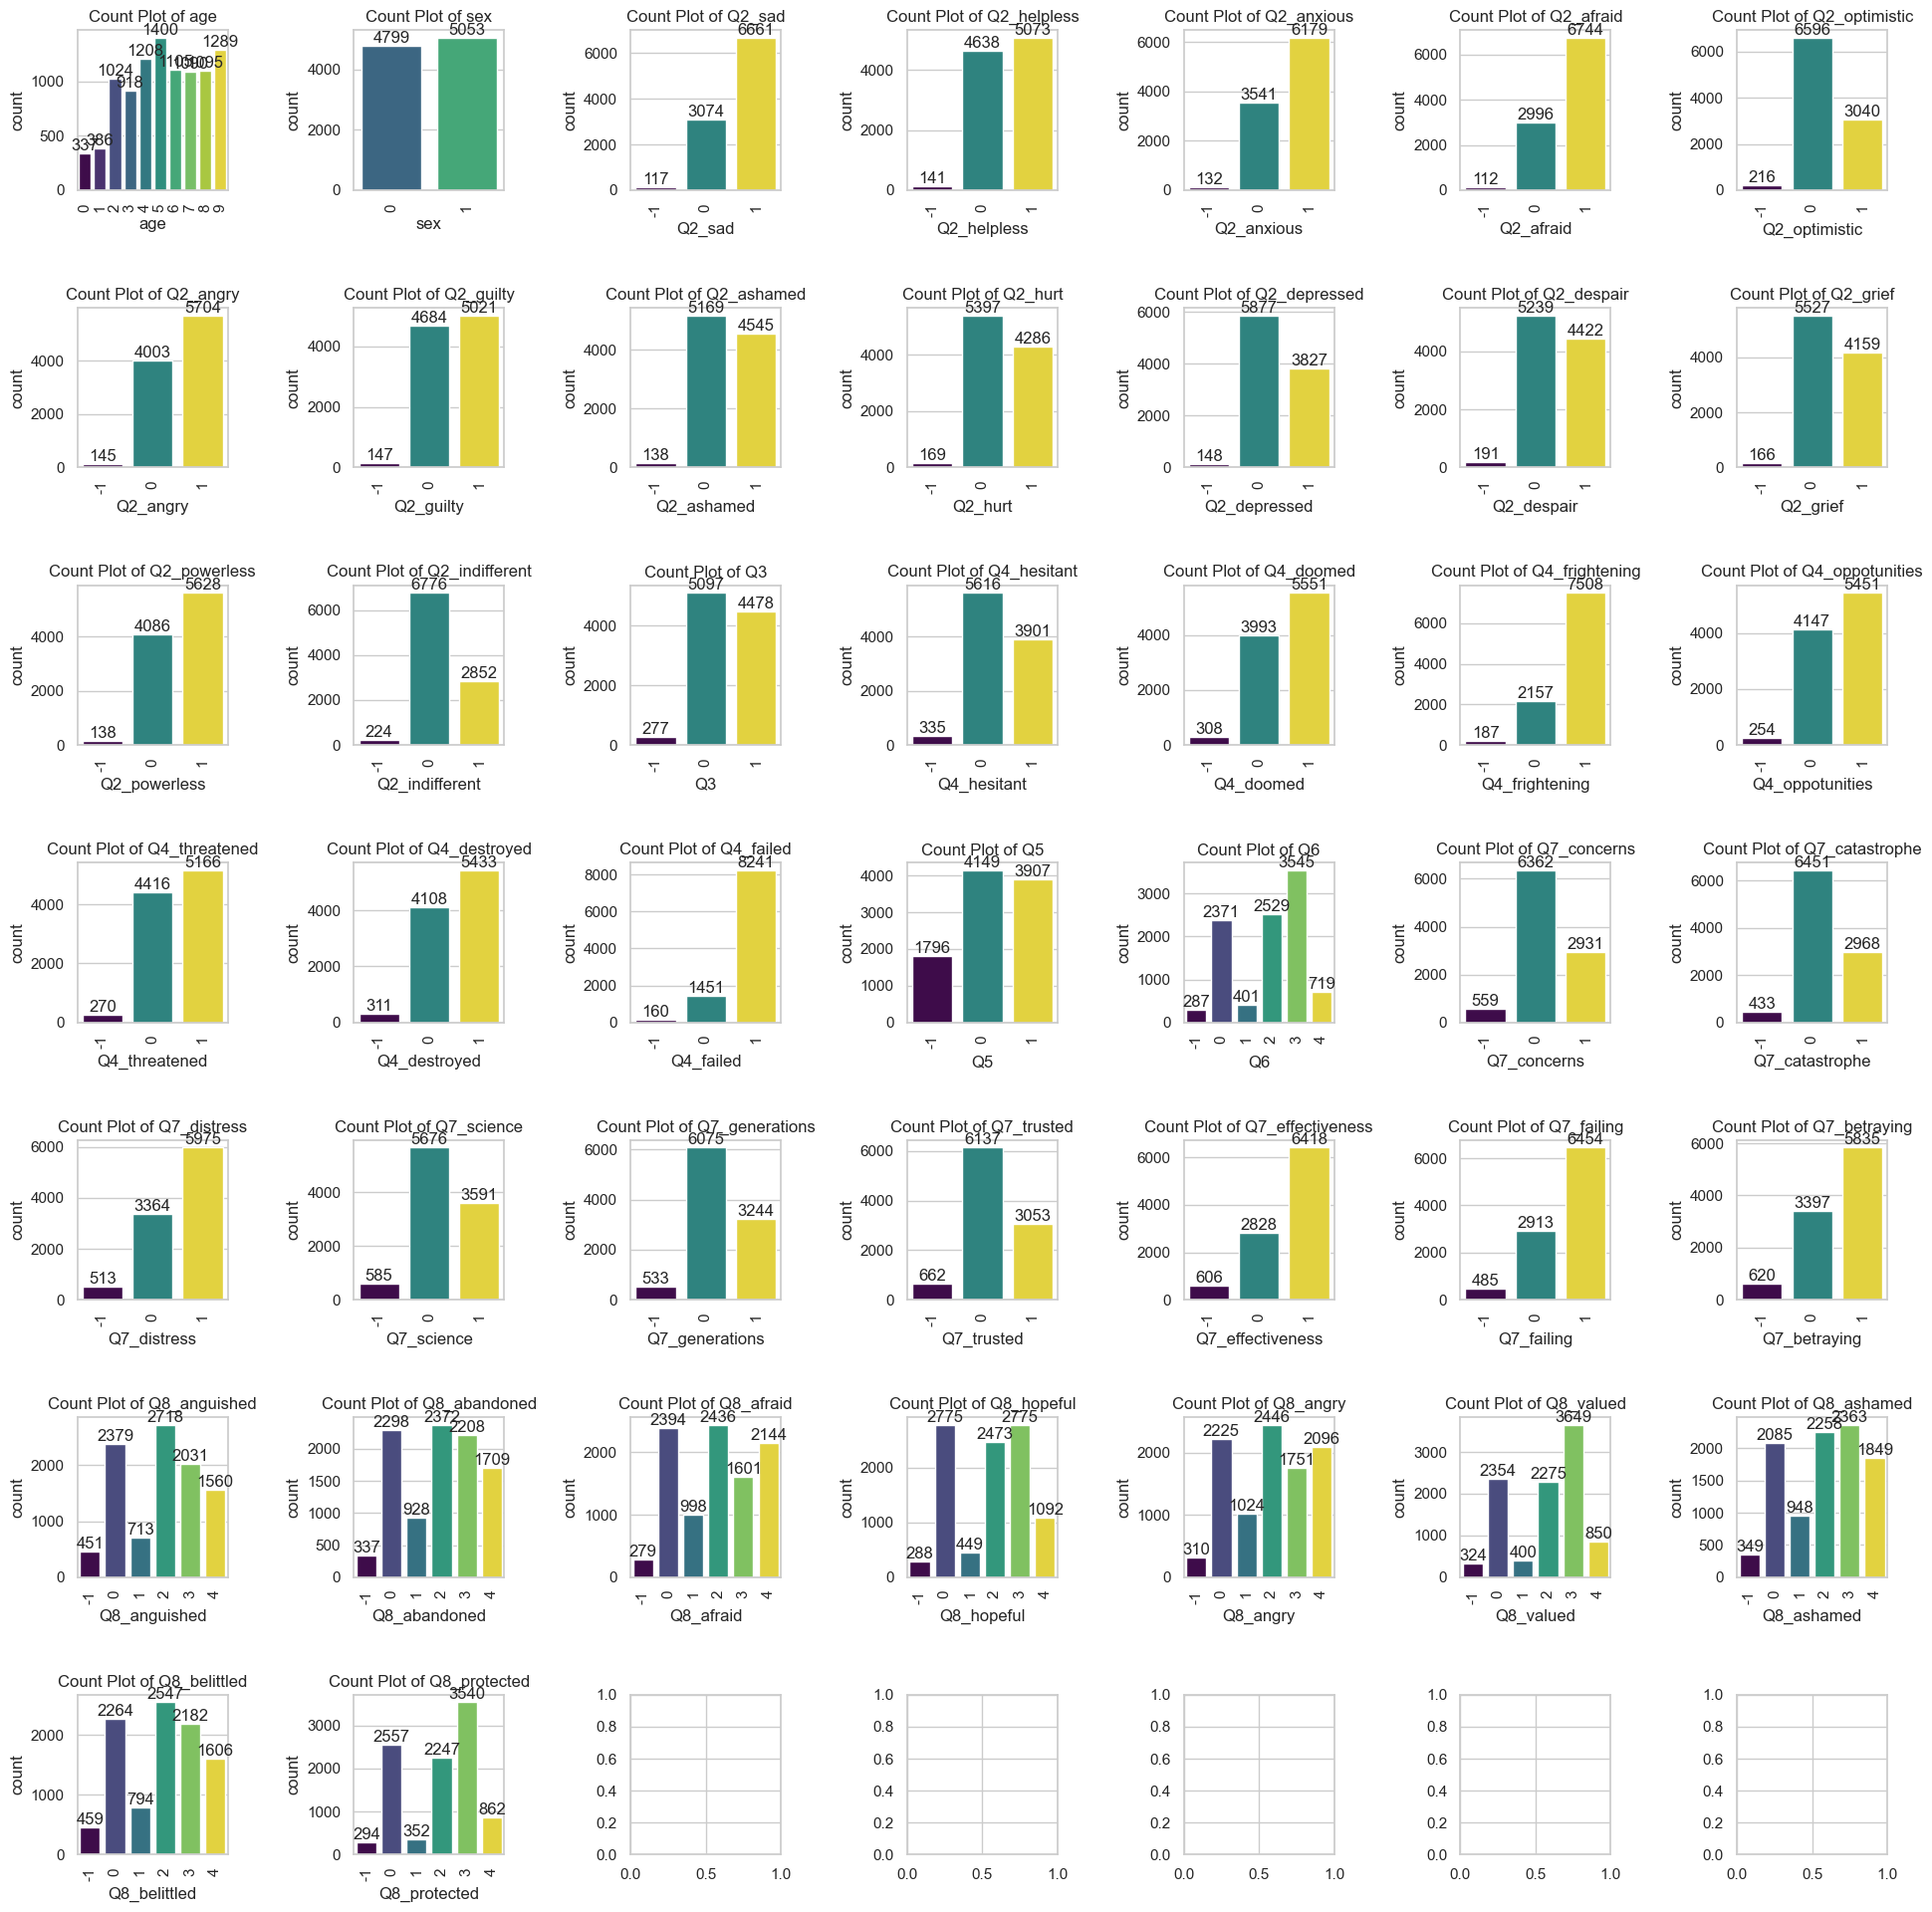

In [24]:
sns.set_theme(style='whitegrid')

# Calculate the number of rows and columns for the subplots
num_columns = len(X.columns)
num_rows = int(np.ceil(np.sqrt(num_columns)))
num_cols = int(np.ceil(num_columns / num_rows))

fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 20))
axes = axes.flatten()

for i, column in enumerate(X.columns):
    ax = sns.countplot(x=column, data=X, hue=column, palette='viridis', legend=False, ax=axes[i])
    ax.set_title(f'Count Plot of {column}')
    ax.tick_params(axis='x', rotation=90)
    
    for p in ax.patches:
        height = p.get_height()
        if not pd.isna(height):
            ax.text(
                x=p.get_x() + p.get_width() / 2,
                y=height,
                s=int(height),
                ha='center',
                va='bottom'
            )

plt.tight_layout(pad=3.0)
plt.show()

<Axes: >

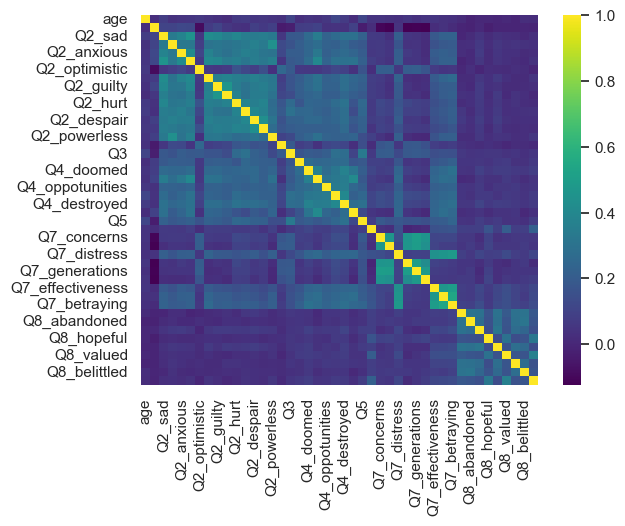

In [25]:
# Correlations

correlations = X.corr()
# print the correlation matrix
sns.heatmap(correlations, annot=False, cmap='viridis')

# Individually, none of the variables that we are using seem to have any practically significant correlations with Q1. 
# The variable with the Q1 correlation with the largest magnitude is Q2_afraid, with a correlaiton of .082.

## Data Analysis
Try data anaylsis with different models. Try with and without non-numeric columns (like language, country).

### Variables + Train and Test Split

In [26]:
X_train, X_test, y_train_orig, y_test_orig = train_test_split(X, y, test_size=0.2, random_state=42)
y_train = y_train_orig.cat.codes
y_test = y_test_orig.cat.codes

In [27]:
X_nominal = X.filter(regex='Q2|Q3|Q4|Q5|Q7')
X_nominal.columns, len(X_nominal.columns)

(Index(['Q2_sad', 'Q2_helpless', 'Q2_anxious', 'Q2_afraid', 'Q2_optimistic',
        'Q2_angry', 'Q2_guilty', 'Q2_ashamed', 'Q2_hurt', 'Q2_depressed',
        'Q2_despair', 'Q2_grief', 'Q2_powerless', 'Q2_indifferent', 'Q3',
        'Q4_hesitant', 'Q4_doomed', 'Q4_frightening', 'Q4_oppotunities',
        'Q4_threatened', 'Q4_destroyed', 'Q4_failed', 'Q5', 'Q7_concerns',
        'Q7_catastrophe', 'Q7_distress', 'Q7_science', 'Q7_generations',
        'Q7_trusted', 'Q7_effectiveness', 'Q7_failing', 'Q7_betraying'],
       dtype='object'),
 32)

In [28]:
# All columns that start with Q6 or Q8 will be in df_ordinal
X_ordinal = X.filter(regex='Q6|Q8')
X_ordinal.columns, len(X_ordinal.columns)

(Index(['Q6', 'Q8_anguished', 'Q8_abandoned', 'Q8_afraid', 'Q8_hopeful',
        'Q8_angry', 'Q8_valued', 'Q8_ashamed', 'Q8_belittled', 'Q8_protected'],
       dtype='object'),
 10)

### Precurssor: KNN Model (K-Nearest Neighbors)

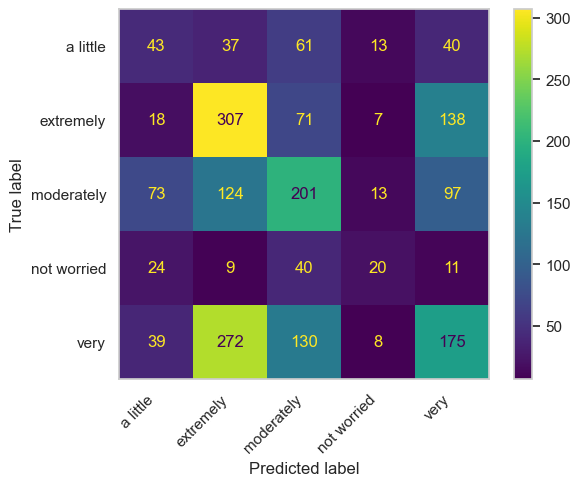

In [29]:
# KNN Classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
cm = confusion_matrix(y_test, y_pred_knn)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=y_test_orig.cat.categories)
disp.plot()
plt.grid(False)
plt.xticks(rotation=45, ha='right')
plt.show()

In [30]:
print(f'{accuracy_score(y_test, y_pred_knn)*100:.2f}%')

37.85%


In [31]:
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.22      0.22      0.22       194
           1       0.41      0.57      0.48       541
           2       0.40      0.40      0.40       508
           3       0.33      0.19      0.24       104
           4       0.38      0.28      0.32       624

    accuracy                           0.38      1971
   macro avg       0.35      0.33      0.33      1971
weighted avg       0.37      0.38      0.37      1971



#### Model 1: Oridnal/Nominal Logistic Regression

##### Nominal & Ordinal Logistic Regression

In [32]:
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
y_pred_logreg = log_reg.predict(X_test)

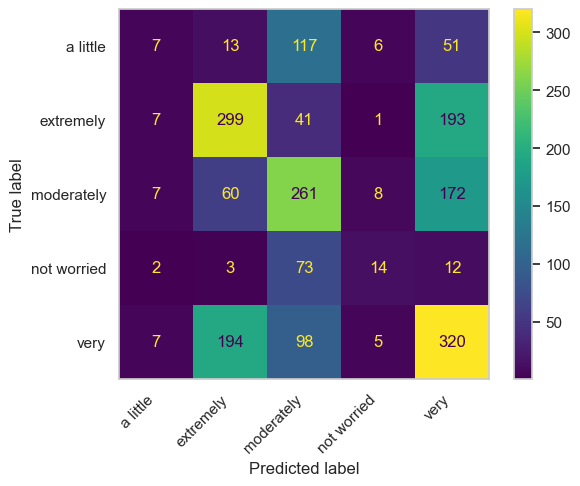

In [33]:
cm = confusion_matrix(y_test, y_pred_logreg)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=y_test_orig.cat.categories)
disp.plot()
plt.grid(False)
plt.xticks(rotation=45, ha='right')
plt.show()

In [34]:
print(f'{accuracy_score(y_test, y_pred_logreg)*100:.2f}%')

45.71%


In [35]:
print(classification_report(y_test, y_pred_logreg))

              precision    recall  f1-score   support

           0       0.23      0.04      0.06       194
           1       0.53      0.55      0.54       541
           2       0.44      0.51      0.48       508
           3       0.41      0.13      0.20       104
           4       0.43      0.51      0.47       624

    accuracy                           0.46      1971
   macro avg       0.41      0.35      0.35      1971
weighted avg       0.44      0.46      0.43      1971



##### Check Class Distribution
It has been noticed through the performance of KNN and logistic regression that the class distribution is not balanced. This will be addressed by using the SMOTE technique in an attempt to balance the class distribution. Moving forward we will use the SMOTE technique to additionally test the performance of the models, alongside the original dataset.

In [36]:
label_counts = y.value_counts()
label_counts

Q1
very           3223
extremely      2706
moderately     2428
a little       1022
not worried     473
Name: count, dtype: int64

##### Resampling Techniques
Resample the data to balance the classes.

In [37]:
smote = SMOTE()
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [38]:
# Log reg with SMOTE
log_reg_smote = LogisticRegression(max_iter=1000)
log_reg_smote.fit(X_train_smote, y_train_smote)
y_pred_smote = log_reg_smote.predict(X_test)

In [39]:
# Check class distribution after SMOTE
y_train.value_counts(), y_train_smote.value_counts()

(4    2599
 1    2165
 2    1920
 0     828
 3     369
 Name: count, dtype: int64,
 1    2599
 4    2599
 3    2599
 2    2599
 0    2599
 Name: count, dtype: int64)

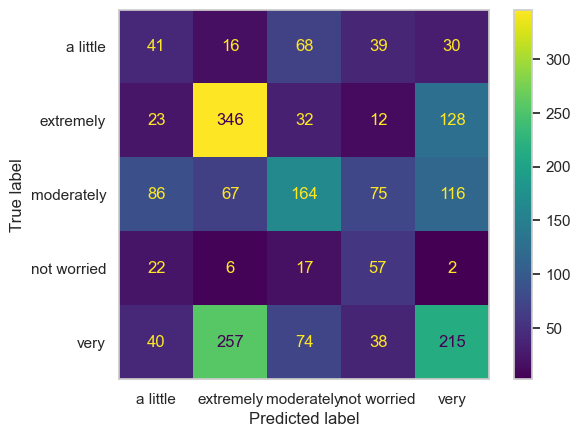

In [85]:
cm = confusion_matrix(y_test, y_pred_smote)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=y_test_orig.cat.categories)
disp.plot()
plt.grid(False)
plt.show()

In [41]:
print(classification_report(y_test, y_pred_smote))

              precision    recall  f1-score   support

           0       0.19      0.21      0.20       194
           1       0.50      0.64      0.56       541
           2       0.46      0.32      0.38       508
           3       0.26      0.55      0.35       104
           4       0.44      0.34      0.39       624

    accuracy                           0.42      1971
   macro avg       0.37      0.41      0.38      1971
weighted avg       0.43      0.42      0.41      1971



In [42]:
# Compare SMOTE accuracy to the original accuracy
print(f'Original Accuracy: {accuracy_score(y_test, y_pred_logreg)*100:.2f}%')
print(f'SMOTE Accuracy: {accuracy_score(y_test, y_pred_smote)*100:.2f}%')

Original Accuracy: 45.71%
SMOTE Accuracy: 41.76%


##### Model Tuning Hyperparameters

Experiment with different model complexities and regularization parameters.

In [43]:
param_grid = {'C': [0.01, 0.1, 1, 10, 100]}
grid = GridSearchCV(LogisticRegression(solver='lbfgs', max_iter=5000), param_grid, cv=5)
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=5000),
             param_grid={'C': [0.01, 0.1, 1, 10, 100]})

In [44]:
print(grid.best_params_)

{'C': 0.1}


In [45]:
y_pred_grid = grid.predict(X_test)
print(classification_report(y_test, y_pred_grid))

              precision    recall  f1-score   support

           0       0.24      0.04      0.06       194
           1       0.53      0.55      0.54       541
           2       0.44      0.52      0.48       508
           3       0.42      0.11      0.17       104
           4       0.43      0.52      0.47       624

    accuracy                           0.46      1971
   macro avg       0.41      0.35      0.34      1971
weighted avg       0.44      0.46      0.44      1971



In [46]:
# Compare the grid search accuracy to the original accuracy
print(f'Original Accuracy: {accuracy_score(y_test, y_pred_logreg)*100:.2f}%')
print(f'Grid Search Accuracy: {accuracy_score(y_test, y_pred_grid)*100:.2f}%')

Original Accuracy: 45.71%
Grid Search Accuracy: 45.97%


##### Model Tuning, with SMOTE

Experiment with different model complexities and regularization parameters. Use SMOTE to balance the classes.

In [47]:
param_grid_smote = {'C': [0.01, 0.1, 1, 10, 100]}
grid_smote = GridSearchCV(LogisticRegression(solver='lbfgs', max_iter=5000), param_grid_smote, cv=5)
grid_smote.fit(X_train_smote, y_train_smote)

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=5000),
             param_grid={'C': [0.01, 0.1, 1, 10, 100]})

In [48]:
print(grid_smote.best_params_)

{'C': 0.1}


In [49]:
y_pred_grid_smote = grid_smote.predict(X_test)
print(classification_report(y_test, y_pred_grid_smote))

              precision    recall  f1-score   support

           0       0.20      0.22      0.21       194
           1       0.50      0.64      0.56       541
           2       0.46      0.32      0.38       508
           3       0.26      0.57      0.36       104
           4       0.44      0.34      0.38       624

    accuracy                           0.42      1971
   macro avg       0.37      0.42      0.38      1971
weighted avg       0.43      0.42      0.41      1971



In [50]:
# Compare SMOTE grid search accuracy to the original accuracy and normal grid search accuracy
print(f'Original Accuracy: {accuracy_score(y_test, y_pred_logreg)*100:.2f}%')
print(f'SMOTE Accuracy: {accuracy_score(y_test, y_pred_smote)*100:.2f}%')
print(f'Grid Search Accuracy: {accuracy_score(y_test, y_pred_grid)*100:.2f}%')
print(f'SMOTE Grid Search Accuracy: {accuracy_score(y_test, y_pred_grid_smote)*100:.2f}%')

Original Accuracy: 45.71%
SMOTE Accuracy: 41.76%
Grid Search Accuracy: 45.97%
SMOTE Grid Search Accuracy: 41.86%


###### Conclusion for SMOTE: Does not appear to help model accuracy. GridSearchCV will be used to tune the model.

##### Nominal
Try nominal logistic regression with the original dataset, with only nominal columns.

In [51]:
nom_X_train, nom_X_test, nom_y_train, nom_y_test = train_test_split(X_nominal, y, test_size=0.2, random_state=42)

# Nominal logistic regression
nominal_logistic = LogisticRegression(max_iter=1000)
nominal_logistic.fit(nom_X_train, nom_y_train)

print(f'{nominal_logistic.score(nom_X_test, nom_y_test)*100:.2f}%')

44.95%


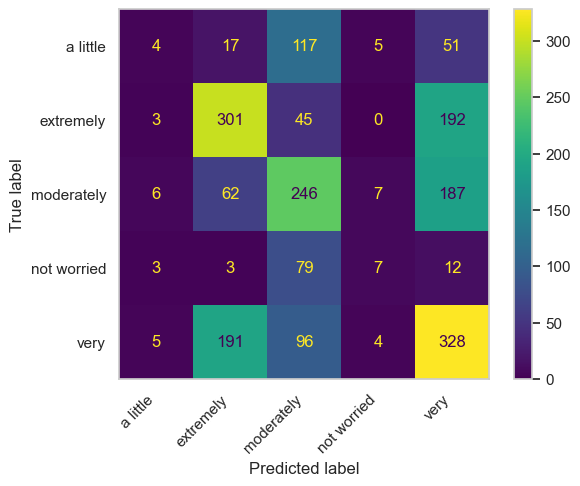

In [52]:
# nominal confusion matrix
nom_y_pred = nominal_logistic.predict(nom_X_test)
nom_cm = confusion_matrix(nom_y_test, nom_y_pred)
nom_disp = ConfusionMatrixDisplay(confusion_matrix=nom_cm, display_labels=nominal_logistic.classes_)
nom_disp.plot()
plt.grid(False)
plt.xticks(rotation=45, ha='right')
plt.show()

In [53]:
print(classification_report(nom_y_test, nom_y_pred))

              precision    recall  f1-score   support

    a little       0.19      0.02      0.04       194
   extremely       0.52      0.56      0.54       541
  moderately       0.42      0.48      0.45       508
 not worried       0.30      0.07      0.11       104
        very       0.43      0.53      0.47       624

    accuracy                           0.45      1971
   macro avg       0.37      0.33      0.32      1971
weighted avg       0.42      0.45      0.42      1971



##### Ordinal

In [54]:
ordinal_X_train, ordinal_X_test, ordinal_y_train, ordinal_y_test = train_test_split(X_ordinal, y, test_size=0.2, random_state=42)

# Ordinal logistic regression
ordinal_logistic = LogisticRegression(max_iter=1000)
ordinal_logistic.fit(ordinal_X_train, ordinal_y_train)

ordinal_logistic.score(ordinal_X_test, ordinal_y_test)

0.3181126331811263

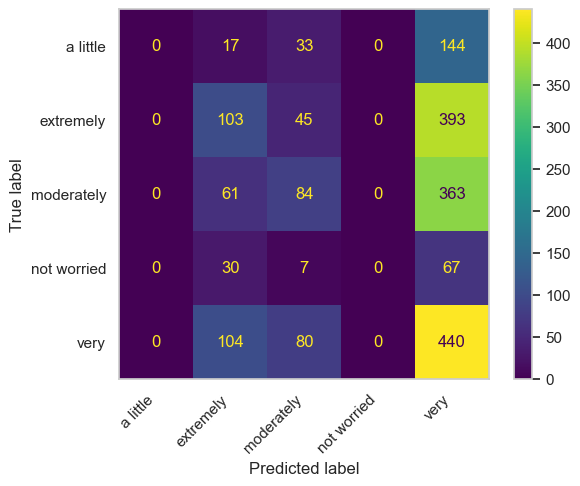

In [55]:
# Ordinal confusion matrix
ordinal_pred = ordinal_logistic.predict(ordinal_X_test)
cm = confusion_matrix(ordinal_y_test, ordinal_pred)
cm_display = ConfusionMatrixDisplay(cm, display_labels=ordinal_logistic.classes_)
cm_display.plot()
plt.grid(False)  # Disable the grid
plt.xticks(rotation=45, ha='right')
plt.show()

In [56]:
print(classification_report(ordinal_y_test, ordinal_pred))

              precision    recall  f1-score   support

    a little       0.00      0.00      0.00       194
   extremely       0.33      0.19      0.24       541
  moderately       0.34      0.17      0.22       508
 not worried       0.00      0.00      0.00       104
        very       0.31      0.71      0.43       624

    accuracy                           0.32      1971
   macro avg       0.20      0.21      0.18      1971
weighted avg       0.28      0.32      0.26      1971



/opt/anaconda3/envs/math/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/math/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/math/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


/var/folders/cn/2914x2w5213cm0p8fp564wfm0000gn/T/ipykernel_64121/336447444.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ordinal_logistic.coef_[0], y=X_ordinal.columns, palette='viridis')


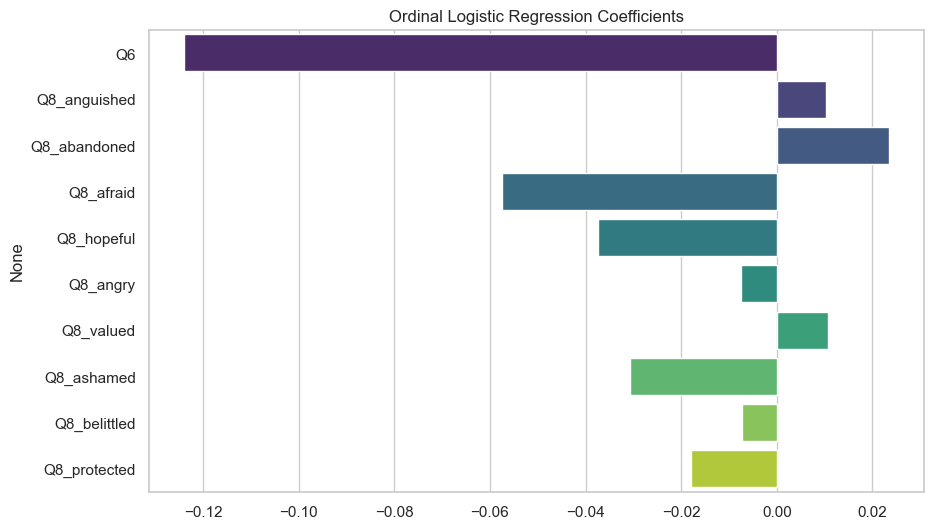

In [57]:
# Plot ordinal logistic regression coefficients
plt.figure(figsize=(10, 6))
sns.barplot(x=ordinal_logistic.coef_[0], y=X_ordinal.columns, palette='viridis')
plt.title('Ordinal Logistic Regression Coefficients')
plt.show()

In [58]:
mod_log = OrderedModel(ordinal_y_train, ordinal_X_train, distr='logit')
res_log = mod_log.fit(method='bfgs')
res_log.summary()

/opt/anaconda3/envs/math/lib/python3.12/site-packages/statsmodels/miscmodels/ordinal_model.py:205: Warning: the endog has ordered == False, risk of capturing a wrong order for the categories. ordered == True preferred.
  warnings.warn("the endog has ordered == False, "


Optimization terminated successfully.
         Current function value: 1.443598
         Iterations: 17
         Function evaluations: 19
         Gradient evaluations: 19


<class 'statsmodels.iolib.summary.Summary'>
"""
                             OrderedModel Results                             
==============================================================================
Dep. Variable:                     Q1   Log-Likelihood:                -11377.
Model:                   OrderedModel   AIC:                         2.278e+04
Method:            Maximum Likelihood   BIC:                         2.288e+04
Date:                Sat, 14 Dec 2024                                         
Time:                        12:41:35                                         
No. Observations:                7881                                         
Df Residuals:                    7867                                         
Df Model:                          10                                         
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Q6                         0.0416      0.015      2.727      0.006       0.012       0.072
Q8_anguished              -0.0327      0.015     -2.122      0.034      -0.063      -0.002
Q8_abandoned               0.0172      0.015      1.118      0.264      -0.013       0.047
Q8_afraid                  0.0119      0.015      0.803      0.422      -0.017       0.041
Q8_hopeful                 0.0134      0.015      0.880      0.379      -0.016       0.043
Q8_angry                  -0.0175      0.015     -1.168      0.243      -0.047       0.012
Q8_valued                 -0.0340      0.016     -2.098      0.036      -0.066      -0.002
Q8_ashamed                 0.0072      0.015      0.476      0.634      -0.022       0.037
Q8_belittled              -0.0028      0.015     -0.183      0.854      -0.033       0.027
Q8_protected              -0.0141      0.016     -0.876      0.381      -0.046       0.017
a little/extremely        -2.1630      0.062    -35.160      0.000      -2.284      -2.042
extremely/moderately       0.5029      0.020     24.588      0.000       0.463       0.543
moderately/not worried    -0.0046      0.021     -0.223      0.824      -0.045       0.036
not worried/very          -1.5819      0.051    -31.071      0.000      -1.682      -1.482
==========================================================================================
"""

In [59]:
num_of_thresholds = 2
mod_log.transform_threshold_params(res_log.params[-num_of_thresholds:])

array([       -inf, -0.00460601,  0.20097732,         inf])

#### Model 2: Random Forest

In [60]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [61]:
y_pred_RF = rf.predict(X_test)
print(f'{accuracy_score(y_test, y_pred_RF)*100:.2f}%')

45.66%


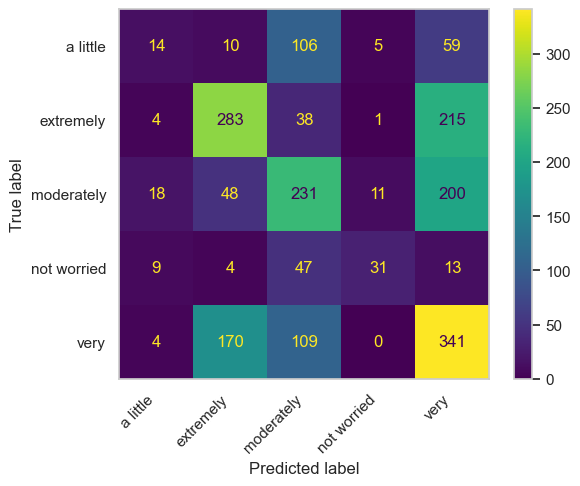

In [62]:
cm = confusion_matrix(y_test, y_pred_RF)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=y_test_orig.cat.categories).plot()
plt.grid(False)
plt.xticks(rotation=45, ha='right')
plt.show()

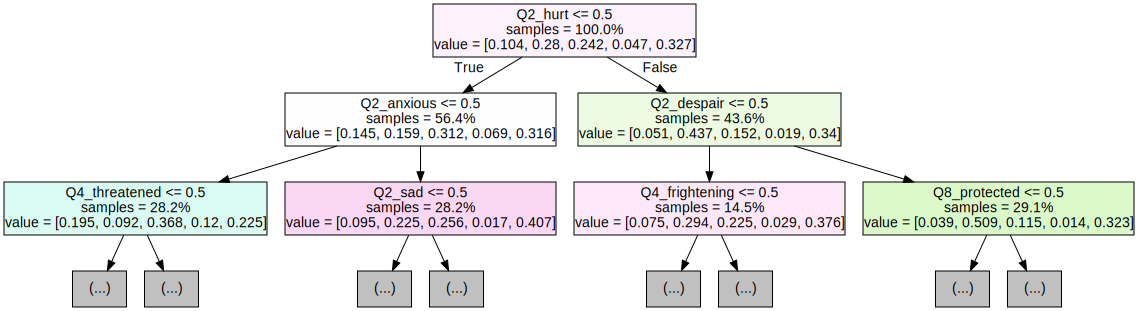

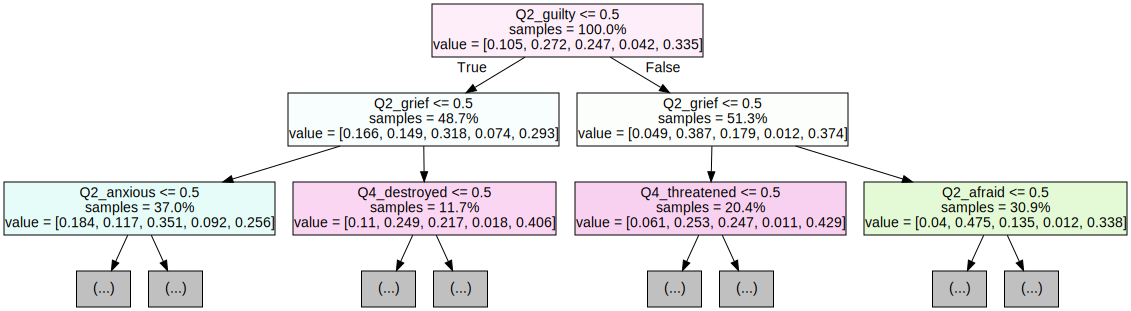

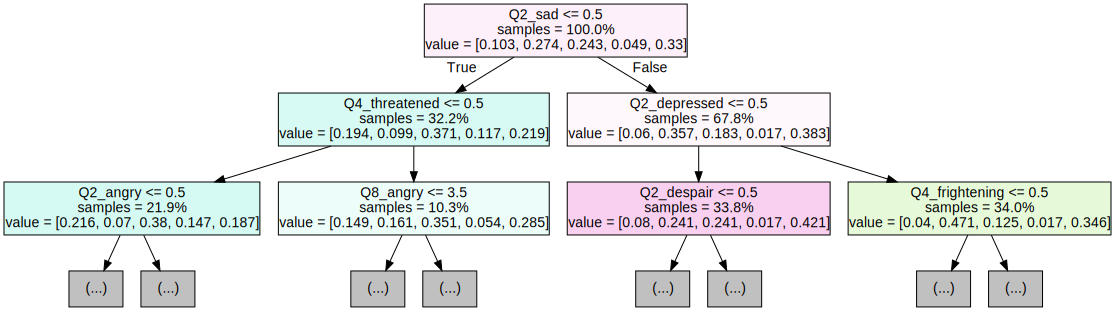

In [63]:
# Export the first three decision trees from the forest

for i in range(3):
    tree = rf.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=X_train.columns,  
                               filled=True,  
                               max_depth=2, 
                               impurity=False, 
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)

In [64]:
param_dist = {'n_estimators': randint(50,500),
              'max_depth': randint(1,20)}

# Create a random forest classifier
rf = RandomForestClassifier()

# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(rf, 
                                 param_distributions = param_dist, 
                                 n_iter=5, 
                                 cv=5)

# Fit the random search object to the data
rand_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=5,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x30f23f230>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x30f1dfa40>})

Best hyperparameters: {'max_depth': 6, 'n_estimators': 207}


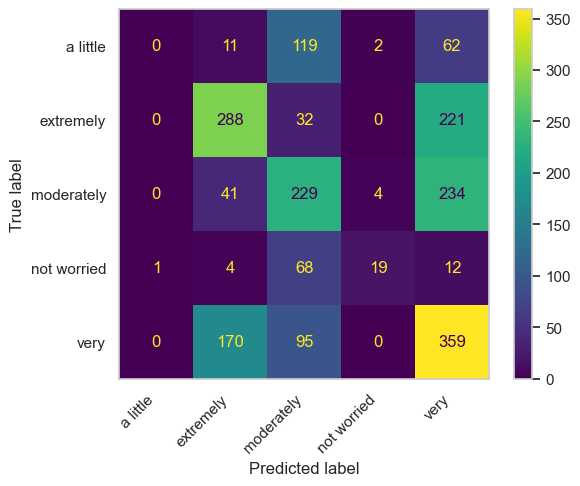

In [65]:
# best model!
best_rf = rand_search.best_estimator_
y_pred_best_rf = best_rf.predict(X_test)
print('Best hyperparameters:',  rand_search.best_params_)
cm = confusion_matrix(y_test, y_pred_best_rf)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=y_test_orig.cat.categories).plot()
plt.grid(False)
plt.xticks(rotation=45, ha='right')
plt.show()

In [66]:
print(f'Best Random Forest Accuracy: {accuracy_score(y_test, y_pred_best_rf)*100:.2f}%')

Best Random Forest Accuracy: 45.41%


##### Random Forest (Bagging Classifier)

In [67]:
tree = DecisionTreeClassifier(min_samples_leaf=7) #min_samples_split=11

In [68]:
ens_model = BaggingClassifier(estimator=tree, n_estimators=100, 
                                  bootstrap=True,
                                  bootstrap_features=True,     # RF
                                  oob_score=True,                     
                                  random_state=0).fit(X_train, y_train)

print('oob score =', ens_model.oob_score_)

y_pred_ens = ens_model.predict(X_test)

oob score = 0.47329019160005076


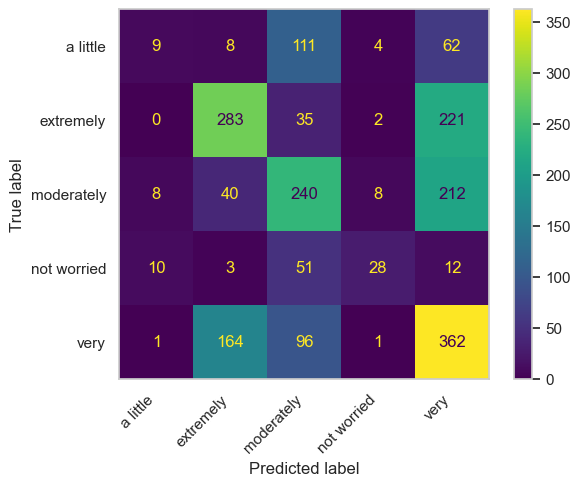

In [69]:
cm = confusion_matrix(y_test, y_pred_ens)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=y_test_orig.cat.categories).plot()
plt.grid(False)
plt.xticks(rotation=45, ha='right')
plt.show()

In [70]:
print(f'Bagging Accuracy: {accuracy_score(y_test, y_pred_ens)*100:.2f}%')
print(f'Bagging Precision: {precision_score(y_test, y_pred_ens, average='macro')*100:.2f}%')
print(f'Bagging Recall: {recall_score(y_test, y_pred_ens, average='macro')*100:.2f}%')

Bagging Accuracy: 46.78%
Bagging Precision: 48.15%
Bagging Recall: 37.83%


#### Model 3: Gradient Boosting (and Hyperparameter Tuning)

This section will use the Gradient Boosting Classifier to predict the response variable. I have implemented the Gradient Boosting Classifier, alongside a preprocessor and pipeline to streamline the process. The model will be evaluated normally, then will evaluated with cross-validation, then hyperparameter tuning will be performed and the model will be evaluated again with cross-validation.

For each classifier, the following steps will be taken:
1. Preprocessing
2. Model Creation
3. Model Evaluation
4. Model Evaluation with Cross-Validation
5. Hyperparameter Tuning
6. Model Evaluation with Best Parameters and Cross-Validation

The best model will be selected, whether it is the original model or one of the tuned models. At the end of this section, the best model and classifier will be selected.


In [81]:
def preprocess_data(X_train):
    num_cols = X_train.select_dtypes(include=['float64']).columns
    cat_cols = X_train.select_dtypes(include=['object', 'category']).columns
    
    transformers = []
    if len(num_cols) > 0:
        transformers.append(('num', StandardScaler(), num_cols))
    if len(cat_cols) > 0:
        transformers.append(('cat', OneHotEncoder(), cat_cols))
    
    if len(transformers) == 0:
        raise ValueError("No columns to transform in the dataset.")
    
    preprocessor = ColumnTransformer(transformers=transformers)
    return preprocessor

def create_classifiers():
    classifiers = [
        ('Logistic Regression', LogisticRegression(max_iter=1000)),
        ('Random Forest', RandomForestClassifier()),
        ('Gradient Boosting', GradientBoostingClassifier())
    ]
    return classifiers

def evaluate_model(name, pipeline, X_train, y_train, X_test, y_test):
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    print(f'\n{name} Classification Report:')
    print(classification_report(y_test, y_pred))
    accuracy = accuracy_score(y_test, y_pred)
    print(f'{name} Accuracy: {accuracy:.4f}')
    return accuracy

def cross_validate_model(pipeline, X, y):
    cv_scores = cross_val_score(pipeline, X, y, cv=5, scoring='accuracy')
    cv_accuracy = cv_scores.mean()
    print(f'Cross-validation Accuracy: {cv_accuracy:.4f} ± {cv_scores.std():.4f}\n\n')
    return cv_accuracy

def hyperparameter_tuning(name, pipeline, X_train, y_train):
    if name == 'Logistic Regression':
        param_grid = {'classifier__C': [0.01, 0.1, 1, 10, 100]}
    elif name == 'Random Forest':
        param_grid = {
            'classifier__n_estimators': [50, 100, 200],
            'classifier__max_depth': [3, 5, 7]
        }
    elif name == 'Gradient Boosting':
        param_grid = {
            'classifier__n_estimators': [50, 100, 200],
            'classifier__learning_rate': [0.01, 0.1, 0.2],
            'classifier__max_depth': [3, 5, 7]
        }
    grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    print(f'{name} Best Hyperparameters:', grid_search.best_params_)
    return grid_search.best_estimator_

def main(X_train, y_train, X_test, y_test, X, y):
    try:
        preprocessor = preprocess_data(X_train)
    except ValueError as e:
        print(e)
        preprocessor = None

    classifiers = create_classifiers()
    best_model = {'name': None, 'model': None, 'accuracy': 0.0}

    for name, classifier in classifiers:
        steps = []
        if preprocessor:
            steps.append(('preprocessor', preprocessor))
        steps.append(('classifier', classifier))
        
        pipeline = Pipeline(steps=steps)
        accuracy = evaluate_model(name, pipeline, X_train, y_train, X_test, y_test)
        if accuracy > best_model['accuracy']:
            best_model = {'name': name, 'model': pipeline, 'accuracy': accuracy}
        
        cv_accuracy = cross_validate_model(pipeline, X, y)
        if cv_accuracy > best_model['accuracy']:
            best_model = {'name': name, 'model': pipeline, 'accuracy': cv_accuracy}
        
        best_estimator = hyperparameter_tuning(name, pipeline, X_train, y_train)
        best_accuracy = evaluate_model(name, best_estimator, X_train, y_train, X_test, y_test)
        if best_accuracy > best_model['accuracy']:
            best_model = {'name': name, 'model': best_estimator, 'accuracy': best_accuracy}
        
        cv_best_accuracy = cross_validate_model(best_estimator, X, y)
        if cv_best_accuracy > best_model['accuracy']:
            best_model = {'name': name, 'model': best_estimator, 'accuracy': cv_best_accuracy}
    
    print(f'The best model is {best_model["name"]} with an accuracy of {best_model["accuracy"]:.4f}')

In [82]:
main(X_train, y_train, X_test, y_test, X, y)

No columns to transform in the dataset.

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.23      0.04      0.06       194
           1       0.53      0.55      0.54       541
           2       0.44      0.51      0.48       508
           3       0.41      0.13      0.20       104
           4       0.43      0.51      0.47       624

    accuracy                           0.46      1971
   macro avg       0.41      0.35      0.35      1971
weighted avg       0.44      0.46      0.43      1971

Logistic Regression Accuracy: 0.4571
Cross-validation Accuracy: 0.4507 ± 0.0156


Logistic Regression Best Hyperparameters: {'classifier__C': 0.1}

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.24      0.04      0.06       194
           1       0.53      0.55      0.54       541
           2       0.44      0.52      0.48       508
           3       

#### Model 4: Neural Network

In [91]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_train = y_train.cat.codes
y_test = y_test.cat.codes

In [92]:
# Make a tensorflow model to predict Q1
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],), kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(5, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

model.evaluate(X_test, y_test)

/opt/anaconda3/envs/math/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
197/197 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.2668 - loss: 3.9483 - val_accuracy: 0.3450 - val_loss: 2.5350
Epoch 2/50
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3265 - loss: 2.3609 - val_accuracy: 0.4153 - val_loss: 1.8390
Epoch 3/50
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 842us/step - accuracy: 0.3896 - loss: 1.7902 - val_accuracy: 0.4039 - val_loss: 1.5611
Epoch 4/50
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 840us/step - accuracy: 0.4153 - loss: 1.5389 - val_accuracy: 0.4496 - val_loss: 1.4365
Epoch 5/50
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 817us/step - accuracy: 0.4169 - loss: 1.4606 - val_accuracy: 0.4616 - val_loss: 1.3658
Epoch 6/50
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 856us/step - accuracy: 0.4205 - loss: 1.3850 - val_accuracy: 0.4591 - val_loss: 1.3400
Epoch 7/50
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 824us/step - accuracy: 0.4205 - loss: 1.3631 - val_accuracy: 0.4623 - val_loss: 1.3151
Epoch 8/50
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 800us/step - accuracy: 0.4373 - loss: 1.3445 - val_

[1.283055067062378, 0.441907674074173]

In [93]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         5,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 5)              │           325 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 92,561 (361.57 KB)

 Trainable params: 30,853 (120.52 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 61,708 (241.05 KB)

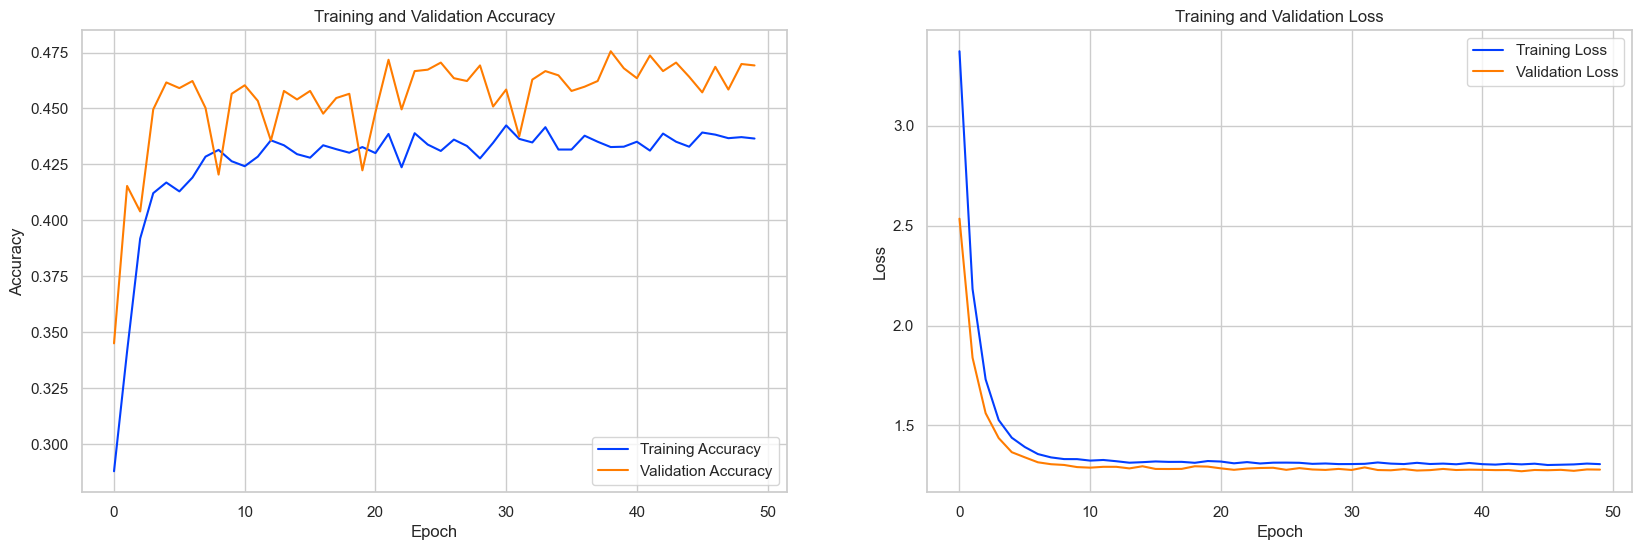

In [94]:
# Accuracy and error plots
sns.set_theme(style='whitegrid')
sns.set_palette('bright')
fig, axes = subplots(1, 2, figsize=(20, 6))

axes[0].plot(history.history['accuracy'], label='Training Accuracy')
axes[0].plot(history.history['val_accuracy'], label='Validation Accuracy')
axes[0].set_title('Training and Validation Accuracy')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Accuracy')
axes[0].legend()

axes[1].plot(history.history['loss'], label='Training Loss')
axes[1].plot(history.history['val_loss'], label='Validation Loss')
axes[1].set_title('Training and Validation Loss')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Loss')
axes[1].legend()

plt.show()

62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 453us/step


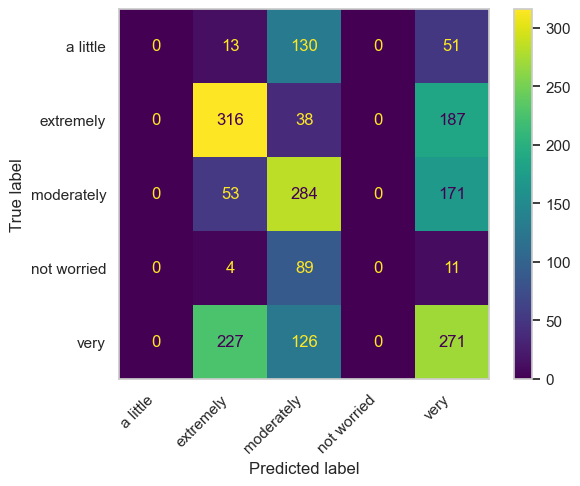

In [98]:
# Confusion matrix
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=y_test_orig.cat.categories)
disp.plot()
plt.grid(False)
plt.xticks(rotation=45, ha='right')
plt.show()

In [96]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       194
           1       0.52      0.58      0.55       541
           2       0.43      0.56      0.48       508
           3       0.00      0.00      0.00       104
           4       0.39      0.43      0.41       624

    accuracy                           0.44      1971
   macro avg       0.27      0.32      0.29      1971
weighted avg       0.38      0.44      0.41      1971



/opt/anaconda3/envs/math/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/math/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/math/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
